# Import Libraries

In [130]:
# Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for preprocessing and data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier

# Import tools for model tuning
from sklearn.model_selection import GridSearchCV

# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# Load DataFrame

In [131]:
# Load the dataset into a DataFrame
df = pd.read_csv("/content/heart.csv")

## Initial Data Inspection

In [132]:
# Display the first few rows and basic structure of the dataset
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

First 5 rows of the DataFrame:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count 

## Handle Missing Values

In [133]:
# Check for missing values in each column and display the count
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


From the output, it is clear that there are no missing values in any of the columns in the dataset.

## Descriptive Statistics

In [134]:
# Display summary statistics for all numerical columns
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [135]:
# Define the list of categorical columns to analyze
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Print descriptive statistics for each categorical column
print("\nDescriptive statistics for categorical columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")

    # Print count of each category
    print("Value Counts:")
    print(df[col].value_counts())

    # Print normalized frequency (percentage) of each category
    print("\nNormalized Frequencies:")
    print(df[col].value_counts(normalize=True).round(2))


Descriptive statistics for categorical columns:

--- Sex ---
Value Counts:
Sex
M    725
F    193
Name: count, dtype: int64

Normalized Frequencies:
Sex
M    0.79
F    0.21
Name: proportion, dtype: float64

--- ChestPainType ---
Value Counts:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Normalized Frequencies:
ChestPainType
ASY    0.54
NAP    0.22
ATA    0.19
TA     0.05
Name: proportion, dtype: float64

--- RestingECG ---
Value Counts:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Normalized Frequencies:
RestingECG
Normal    0.60
LVH       0.20
ST        0.19
Name: proportion, dtype: float64

--- ExerciseAngina ---
Value Counts:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Normalized Frequencies:
ExerciseAngina
N    0.6
Y    0.4
Name: proportion, dtype: float64

--- ST_Slope ---
Value Counts:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Normalized Frequencies:
ST_Slope
F

### Summary of Descriptive Statistics

**Numerical Features:**

*   **Age**: Ranges from 28 to 77 years, with a mean of approximately 53.5 years. The relatively small standard deviation (9.43) suggests that most patients are clustered around the mean age, but there's still a good spread to capture different age groups.
*   **RestingBP (Resting Blood Pressure)**: Ranges from 80 to 200 mm Hg, with a mean of about 132.5 mm Hg. The standard deviation of 17.99 indicates a moderate spread in blood pressure values. The minimum value of 80 is healthy, while the maximum of 200 is quite high, suggesting potential hypertension issues in some patients.
*   **Cholesterol**: Shows a wide range from 85 to 603 mg/dL, with a mean of 243.2 mg/dL. The standard deviation of 53.4 suggests significant variability. There are values as low as 85, which might indicate some entries with potentially problematic low cholesterol or data anomalies (often, 0 values can signify missing data in medical datasets, which needs further investigation if present).
*   **FastingBS (Fasting Blood Sugar)**: This is a binary-like feature (0 or 1), indicating if fasting blood sugar is > 120 mg/dL. The mean of 0.23 indicates that about 23% of the patients have fasting blood sugar > 120 mg/dL.
*   **MaxHR (Maximum Heart Rate Achieved)**: Ranges from 60 to 202 bpm, with a mean of 136.8 bpm. This range covers a wide spectrum of physical fitness levels.
*   **Oldpeak (ST depression induced by exercise relative to rest)**: Ranges from -2.6 to 6.2, with a mean of 0.89. The negative minimum value might represent ST elevation, which is also clinically relevant. The presence of values up to 6.2 suggests significant ST depression in some cases.
*   **HeartDisease (Target Variable)**: A binary variable (0 for no disease, 1 for disease). The mean of 0.55 indicates that approximately 55.3% of the patients in this dataset have heart disease, suggesting a slightly imbalanced but manageable dataset for classification.

**Categorical Features:**

*   **Sex**: The dataset is predominantly male (79%) compared to female (21%). This imbalance might need to be considered during modeling to ensure fair representation or to assess performance across genders.
*   **ChestPainType**: Atypical Angina (ATA) is the most common type of chest pain (54%), followed by Non-Anginal Pain (NAP, 22%), Asymptomatic (ASY, 19%), and Typical Angina (TA, 5%). This distribution provides insight into the types of chest pain experienced by patients.
*   **RestingECG**: Normal ECG results are the most frequent (60%), followed by LVH (Left Ventricular Hypertrophy, 20%) and ST (ST-T wave abnormality, 19%).
*   **ExerciseAngina**: The majority of patients (60%) do not experience exercise-induced angina, while 40% do.
*   **ST_Slope**: Flat ST slope is the most common (50%), followed by Up-sloping (43%) and Down-sloping (7%). The distribution of these types can be indicative of myocardial ischemia.

**Overall Insights:**

The descriptive statistics reveal a diverse patient population with a mix of healthy and concerning physiological measurements. There's a notable gender imbalance and varied distributions across different categorical features. The presence of a significant portion of patients with heart disease (55.3%) suggests the dataset is suitable for predicting the condition. The range of values for numerical features like 'Cholesterol' and 'Oldpeak' indicates potential outliers or data points requiring further examination (e.g., 'Cholesterol' values of 0 often mean missing data, though not explicitly stated as missing in the `.isnull().sum()` check, they are physiologically implausible).

## Visualize Numerical Feature Distributions

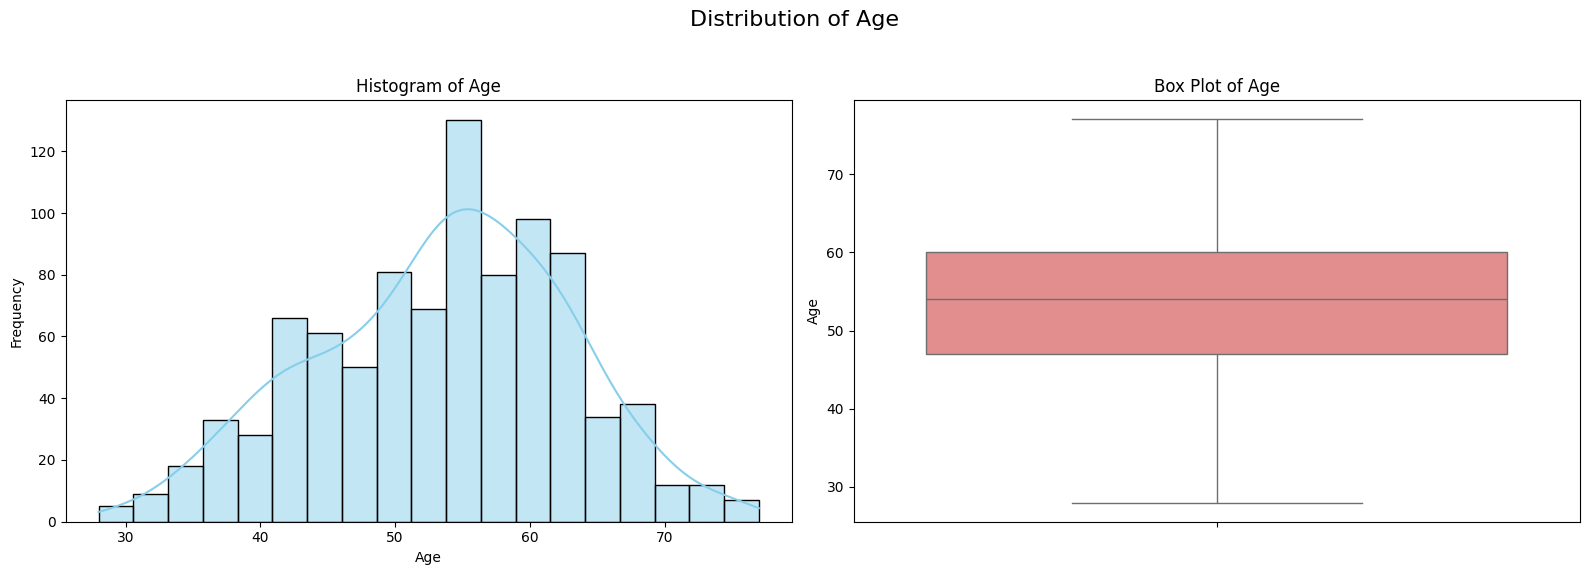

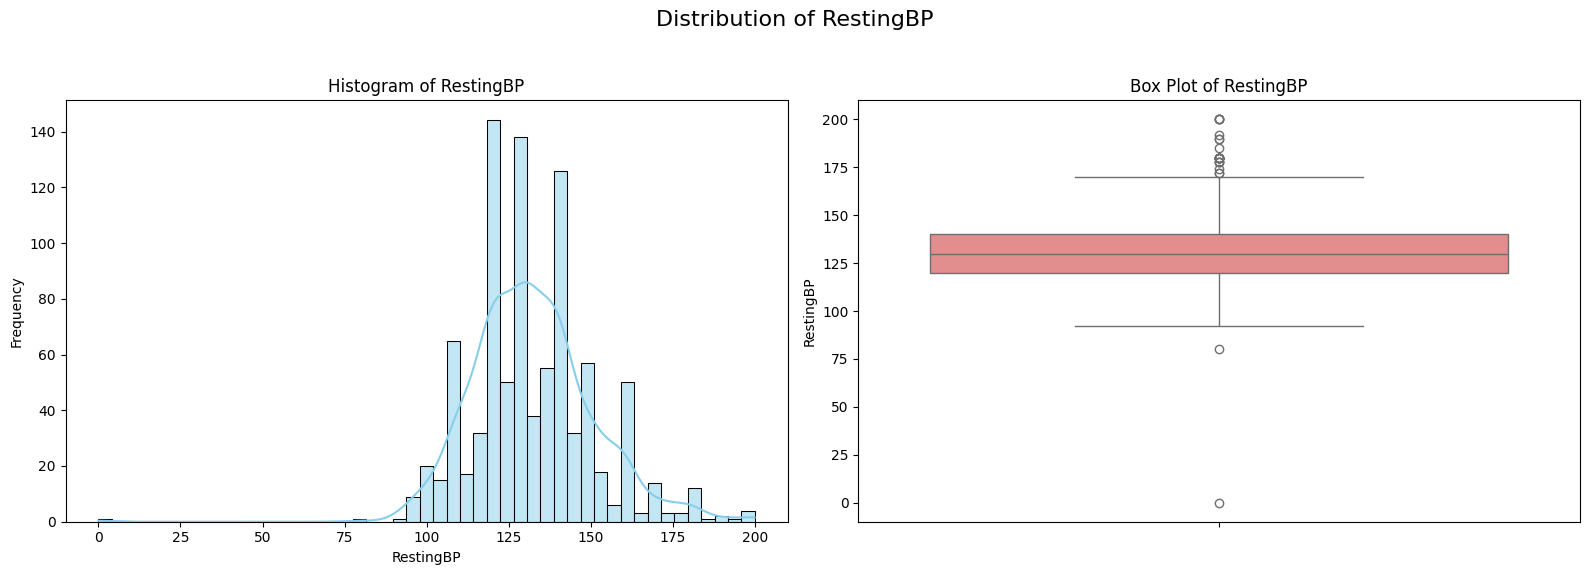

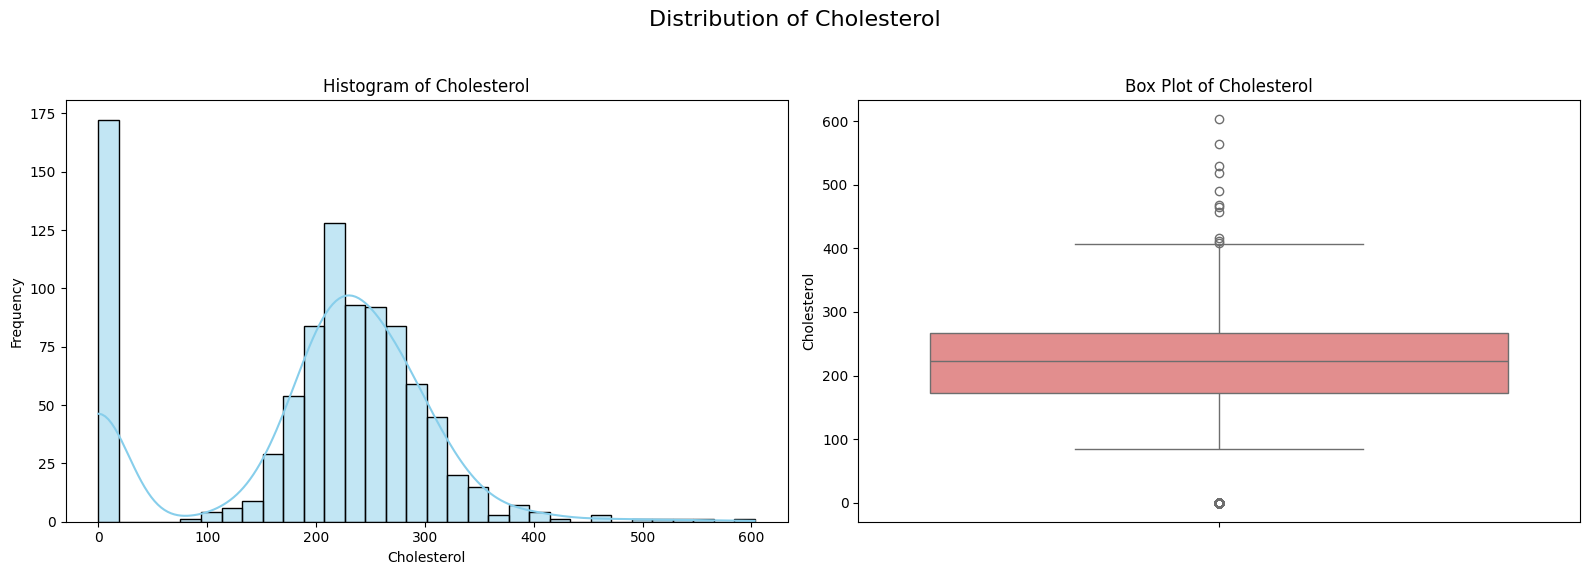

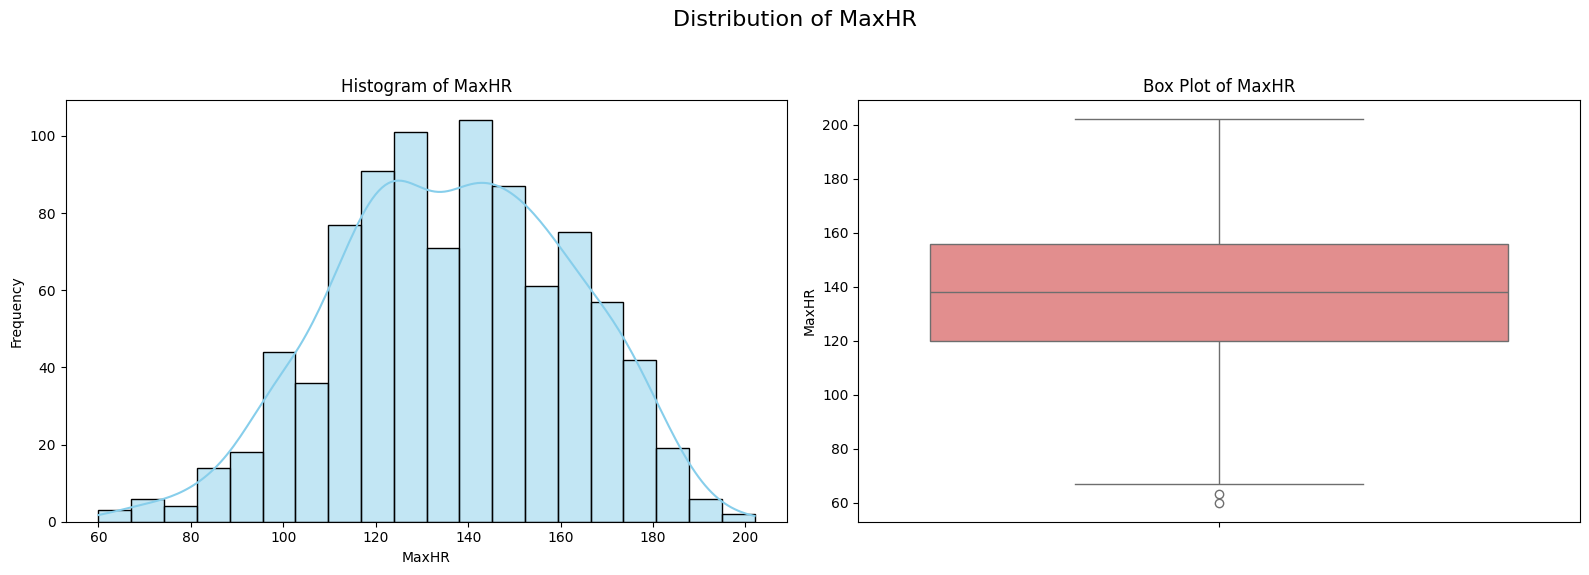

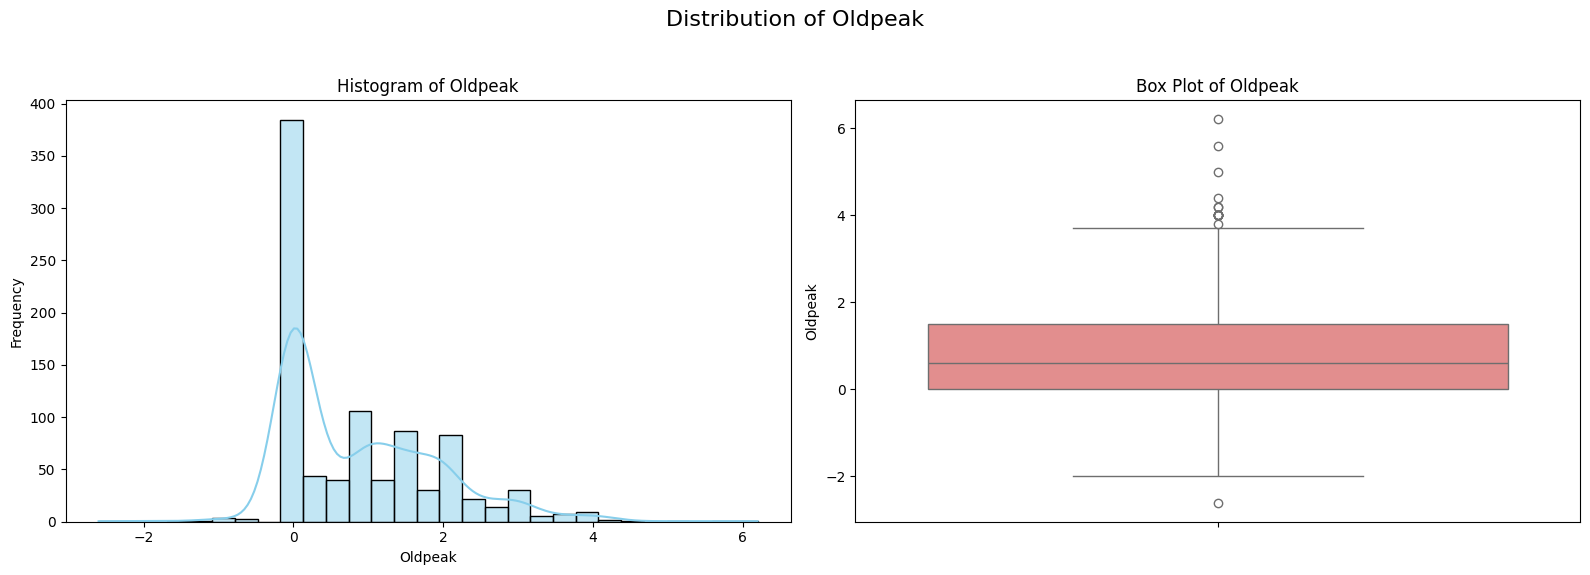

In [136]:
# Define a list of numerical features to analyze their distribution
numerical_features_for_analysis = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Plot histogram and box plot for each numerical feature
for feature in numerical_features_for_analysis:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Distribution of {feature}', fontsize=16)

    # Histogram with KDE to show distribution and density
    sns.histplot(df[feature], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    # Box plot to show spread, median, and outliers
    sns.boxplot(y=df[feature], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Box Plot of {feature}')
    axes[1].set_ylabel(feature)

    # Adjust spacing to fit the overall title and subplots nicely
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### Learnings from Numerical Feature Distributions

**1. Age:**
*   **Distribution**: The histogram shows a somewhat normal distribution, slightly skewed towards older ages. Most patients are between 40 and 70 years old.
*   **Outliers**: The box plot confirms that there are no significant outliers, with the data mostly concentrated around the median age.

**2. RestingBP (Resting Blood Pressure):**
*   **Distribution**: The distribution is generally bell-shaped but exhibits a slight positive skew. Most values are concentrated between 120 and 150 mm Hg.
*   **Outliers**: The box plot clearly indicates the presence of several outliers on the higher end (above 180 mm Hg), suggesting some patients have significantly elevated blood pressure. A few outliers are also present on the lower end.

**3. Cholesterol:**
*   **Distribution**: The histogram reveals a distribution that is positively skewed, with a long tail stretching to higher cholesterol levels. A significant number of entries are clustered at lower values, including a notable peak at zero. As noted in descriptive statistics, cholesterol values of 0 are physiologically implausible and likely represent missing or unrecorded data.
*   **Outliers**: The box plot shows many outliers on the higher end, indicating several patients with very high cholesterol levels. The presence of 0 values also appears as outliers on the lower end, further emphasizing the need to handle these anomalies.

**4. MaxHR (Maximum Heart Rate Achieved):**
*   **Distribution**: The histogram suggests a relatively normal to slightly negatively skewed distribution, with a wide range of heart rates. The peak frequency is around 150-160 bpm.
*   **Outliers**: The box plot shows some outliers on both the lower and higher ends, although they are not as extreme as those observed in Cholesterol or RestingBP.

**5. Oldpeak (ST depression induced by exercise relative to rest):**
*   **Distribution**: The histogram is heavily skewed to the right, with a large concentration of values around 0. This indicates that many patients have little to no ST depression. There's a significant tail extending to positive values.
*   **Outliers**: The box plot shows numerous outliers, especially on the higher positive side, indicating patients with substantial ST depression. There are also a few negative values, potentially representing ST elevation.

**Overall Insights from Visualizations:**
*   Several numerical features ('RestingBP', 'Cholesterol', 'Oldpeak') exhibit significant outliers and skewness, which could impact model performance and may require specific preprocessing steps (e.g., outlier treatment, transformation) before modeling.
*   The presence of 0 values in 'Cholesterol' is a critical observation, as these are likely missing data entries and need appropriate handling.

## Visualize Categorical Feature Distributions

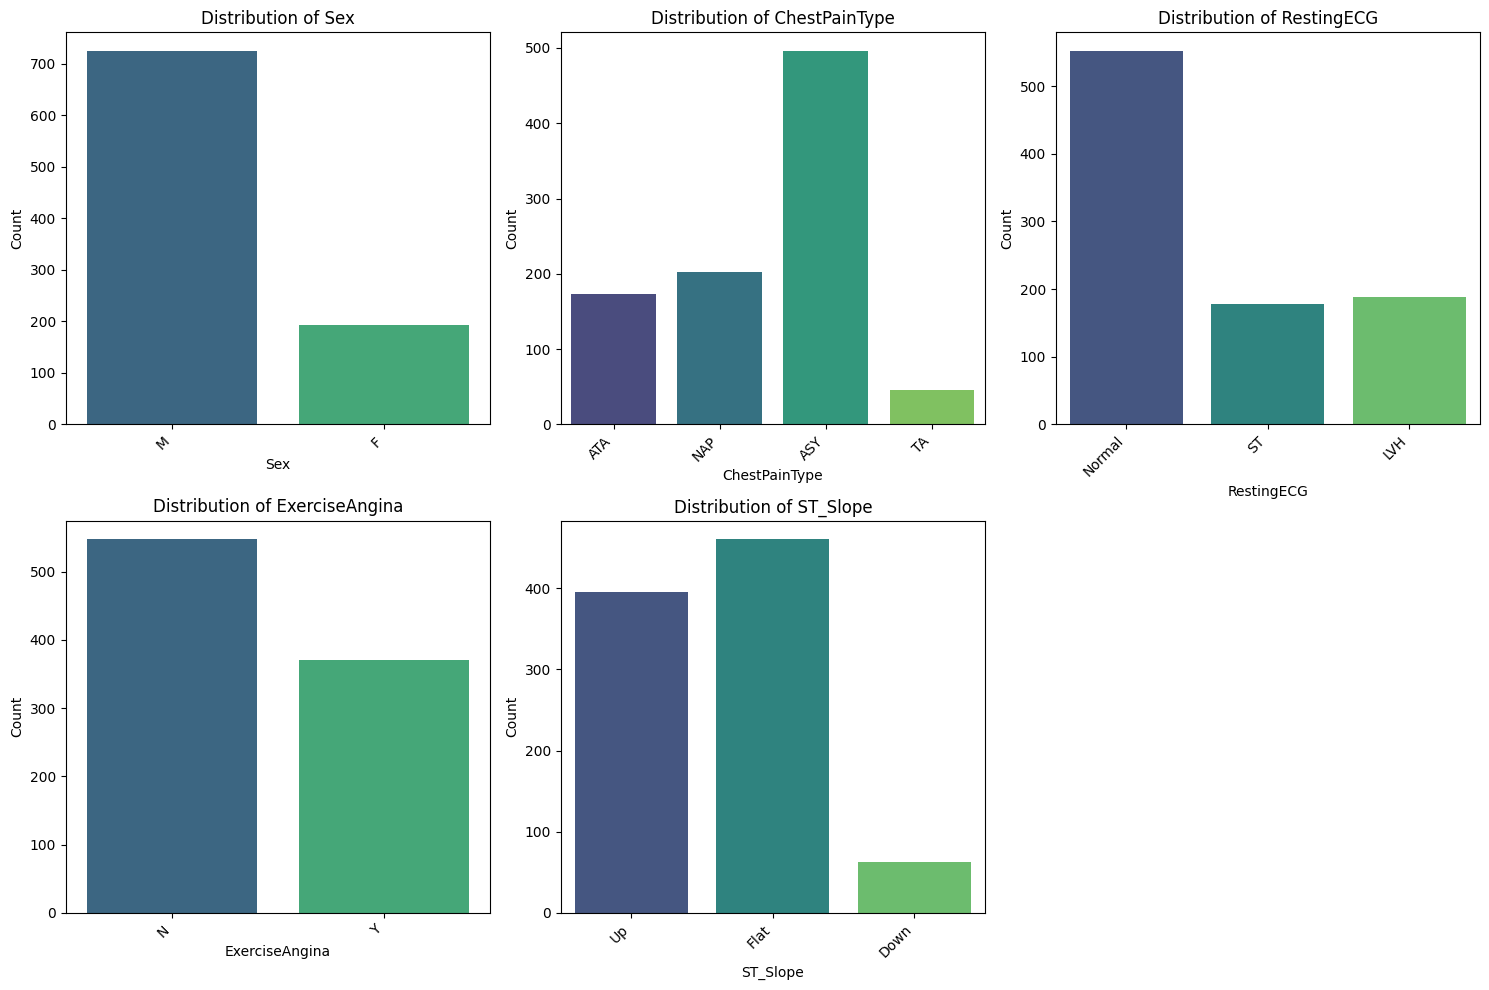

In [137]:
# Define categorical columns to visualize
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create count plots for each categorical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)  # Position the subplot in a 2x3 grid
    sns.countplot(data=df, x=feature, hue=feature, palette='viridis', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

### Learnings from Categorical Feature Distributions

**1. Sex:**
*   **Observation**: The dataset is heavily skewed towards males, with a significantly larger count of 'M' (Male) entries compared to 'F' (Female) entries.
*   **Insight**: Approximately 79% of the patients are male, and 21% are female. This imbalance is important to note, as heart disease can manifest differently across genders, and this imbalance might affect model training if not handled properly or considered during interpretation.

**2. ChestPainType:**
*   **Observation**: The most frequent `ChestPainType` is 'ASY' (Asymptomatic), followed by 'NAP' (Non-Anginal Pain), 'ATA' (Atypical Angina), and 'TA' (Typical Angina) is the least frequent.
*   **Insight**: 'ASY' accounts for about 54% of cases, 'NAP' for 22%, 'ATA' for 19%, and 'TA' for 5%. This distribution indicates that a large portion of patients might not experience typical chest pain symptoms, which can be critical for diagnosis and modeling.

**3. RestingECG:**
*   **Observation**: 'Normal' ECG results are the most common category, followed by 'LVH' (Left Ventricular Hypertrophy) and 'ST' (ST-T wave abnormality).
*   **Insight**: About 60% of patients have 'Normal' resting ECG, 20% have 'LVH', and 19% have 'ST' abnormalities. This indicates a considerable portion of the dataset shows ECG abnormalities, which are important indicators for heart conditions.

**4. ExerciseAngina:**
*   **Observation**: More patients do not experience exercise-induced angina ('N') than those who do ('Y').
*   **Insight**: Approximately 60% of patients do not have exercise-induced angina, while 40% do. This feature shows a relatively balanced distribution, but still with a clear majority in one category.

**5. ST_Slope:**
*   **Observation**: The 'Flat' ST slope is the most common, followed closely by 'Up' (up-sloping), with 'Down' (down-sloping) being significantly less frequent.
*   **Insight**: 'Flat' ST slope accounts for about 50% of cases, 'Up' for 43%, and 'Down' for 7%. 'Flat' and 'Down' ST slopes are often indicative of myocardial ischemia, while an 'Up' slope is generally considered normal or benign. The high proportion of 'Flat' and 'Up' slopes provides valuable diagnostic information.

## Analyze Feature Relationships

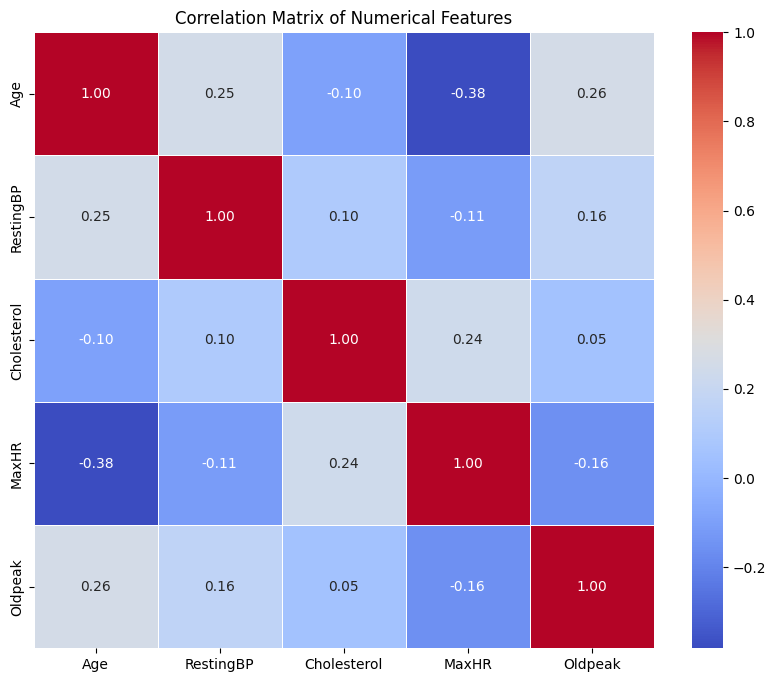

In [138]:
# Define the numerical columns to include in the correlation analysis
numerical_cols_for_correlation = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Compute the correlation matrix
correlation_matrix = df[numerical_cols_for_correlation].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Crosstabulations for Categorical Features:

Sex vs. ChestPainType:
ChestPainType  ASY  ATA  NAP  TA
Sex                             
F               70   60   53  10
M              426  113  150  36


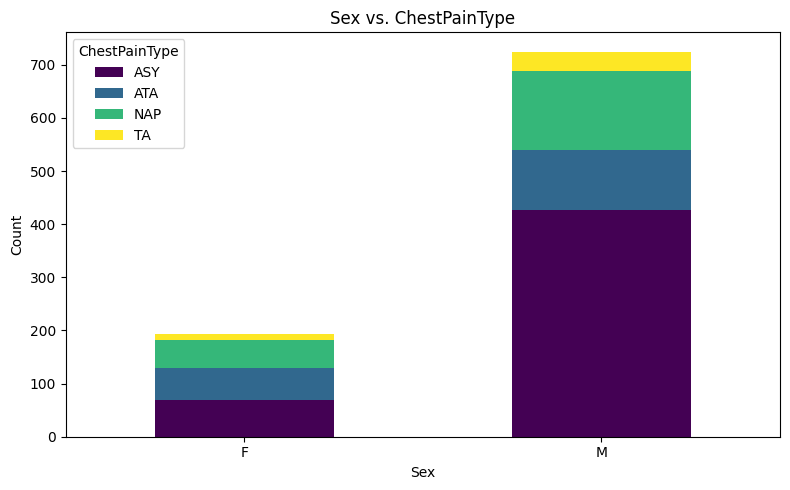


ChestPainType vs. RestingECG:
RestingECG     LVH  Normal   ST
ChestPainType                  
ASY            102     284  110
ATA             23     123   27
NAP             47     123   33
TA              16      22    8


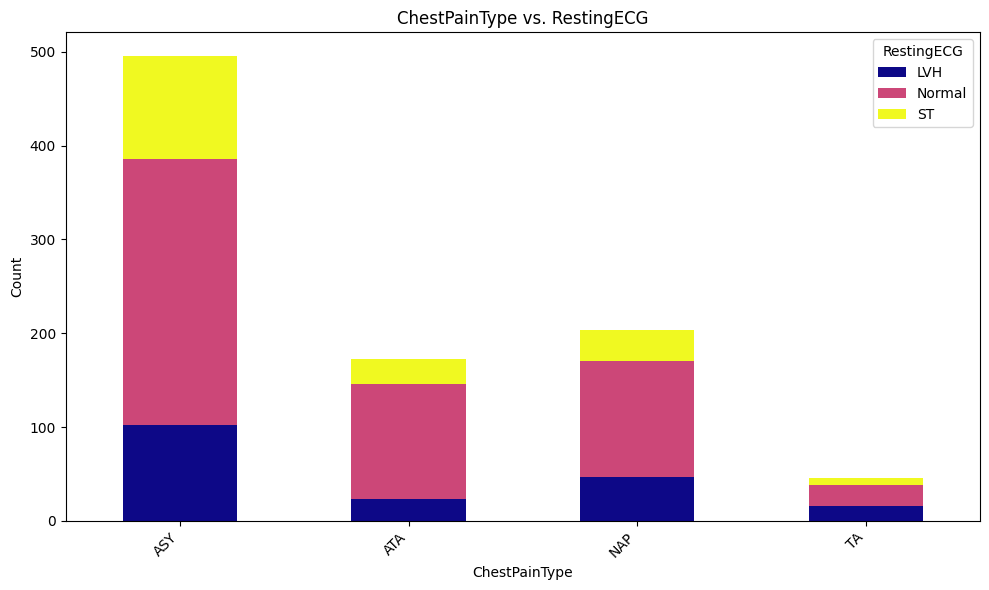


ExerciseAngina vs. ST_Slope:
ST_Slope        Down  Flat   Up
ExerciseAngina                 
N                 22   188  337
Y                 41   272   58


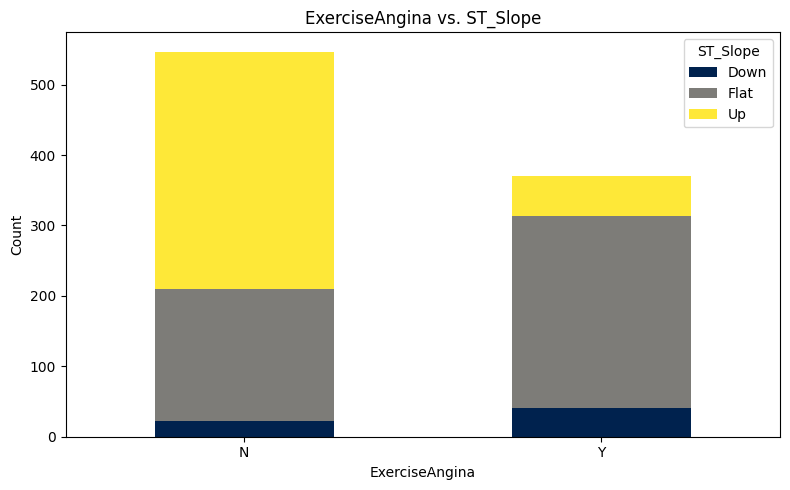

In [139]:
# Crosstabulations for exploring relationships between categorical features
print("\nCrosstabulations for Categorical Features:")

# 1. Sex vs. ChestPainType
crosstab_sex_cpt = pd.crosstab(df['Sex'], df['ChestPainType'])
print("\nSex vs. ChestPainType:")
print(crosstab_sex_cpt)

# Stacked bar chart for Sex vs. ChestPainType
crosstab_sex_cpt.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Sex vs. ChestPainType')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='ChestPainType')
plt.tight_layout()
plt.show()

# 2. ChestPainType vs. RestingECG
crosstab_cpt_recg = pd.crosstab(df['ChestPainType'], df['RestingECG'])
print("\nChestPainType vs. RestingECG:")
print(crosstab_cpt_recg)

# Stacked bar chart for ChestPainType vs. RestingECG
crosstab_cpt_recg.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('ChestPainType vs. RestingECG')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='RestingECG')
plt.tight_layout()
plt.show()

# 3. ExerciseAngina vs. ST_Slope
crosstab_ea_sts = pd.crosstab(df['ExerciseAngina'], df['ST_Slope'])
print("\nExerciseAngina vs. ST_Slope:")
print(crosstab_ea_sts)

# Stacked bar chart for ExerciseAngina vs. ST_Slope
crosstab_ea_sts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='cividis')
plt.title('ExerciseAngina vs. ST_Slope')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='ST_Slope')
plt.tight_layout()
plt.show()

### Learnings from Feature Relationships

**Numerical Feature Relationships (from Correlation Matrix):**

*   **Age and MaxHR**: There is a moderate negative correlation (-0.38) between 'Age' and 'MaxHR'. This is expected, as maximum heart rate typically decreases with age.
*   **Age and RestingBP**: A weak positive correlation (0.26) exists between 'Age' and 'RestingBP', suggesting that blood pressure tends to slightly increase with age.
*   **Oldpeak and Age/RestingBP**: 'Oldpeak' shows weak positive correlations with 'Age' (0.26) and 'RestingBP' (0.17). This indicates that higher age and resting blood pressure might be associated with greater ST depression during exercise.
*   **Cholesterol**: 'Cholesterol' shows very weak correlations with all other numerical features, suggesting it operates relatively independently in terms of linear relationships within this dataset. The correlations are close to zero for 'Age' (0.045), 'RestingBP' (0.086), 'MaxHR' (-0.0016), and 'Oldpeak' (0.054). This further emphasizes the potential data quality issues with the `Cholesterol` feature (specifically the 0 values), as physiologically, cholesterol should have some relationship with other cardiovascular indicators.
*   **Other Correlations**: Most other numerical feature pairs exhibit weak correlations (absolute value less than 0.2), implying that they do not have strong linear relationships with each other.

**Categorical Feature Relationships (from Crosstabulations and Stacked Bar Plots):**

*   **Sex vs. ChestPainType**: Males (M) exhibit 'ASY' (Asymptomatic) chest pain significantly more often than females (F). Females, while a smaller group overall, show a relatively higher proportion of 'ATA' (Atypical Angina) compared to males. This highlights potential gender-based differences in chest pain presentation.
*   **ChestPainType vs. RestingECG**: 'ASY' ChestPainType patients tend to have 'Normal' RestingECG results more frequently than other ChestPainTypes, but also a considerable number with 'LVH' and 'ST' abnormalities. Patients with 'ATA' and 'NAP' chest pain also frequently have 'Normal' ECGs, but their proportions for 'LVH' and 'ST' vary. This suggests that while chest pain type is a strong indicator, it's not exclusively tied to specific ECG findings.
*   **ExerciseAngina vs. ST_Slope**: Patients who experience 'ExerciseAngina' (Y) are much more likely to have a 'Flat' or 'Down' ST_Slope. Conversely, patients who do not experience 'ExerciseAngina' (N) predominantly have an 'Up' ST_Slope. This is a very strong and expected relationship, as 'Flat' and 'Down' ST slopes are critical indicators of myocardial ischemia (reduced blood flow to the heart muscle) often triggered by exercise. This indicates that these two features are highly interdependent and could be powerful predictors for heart disease.

## Relationship with Target Variable

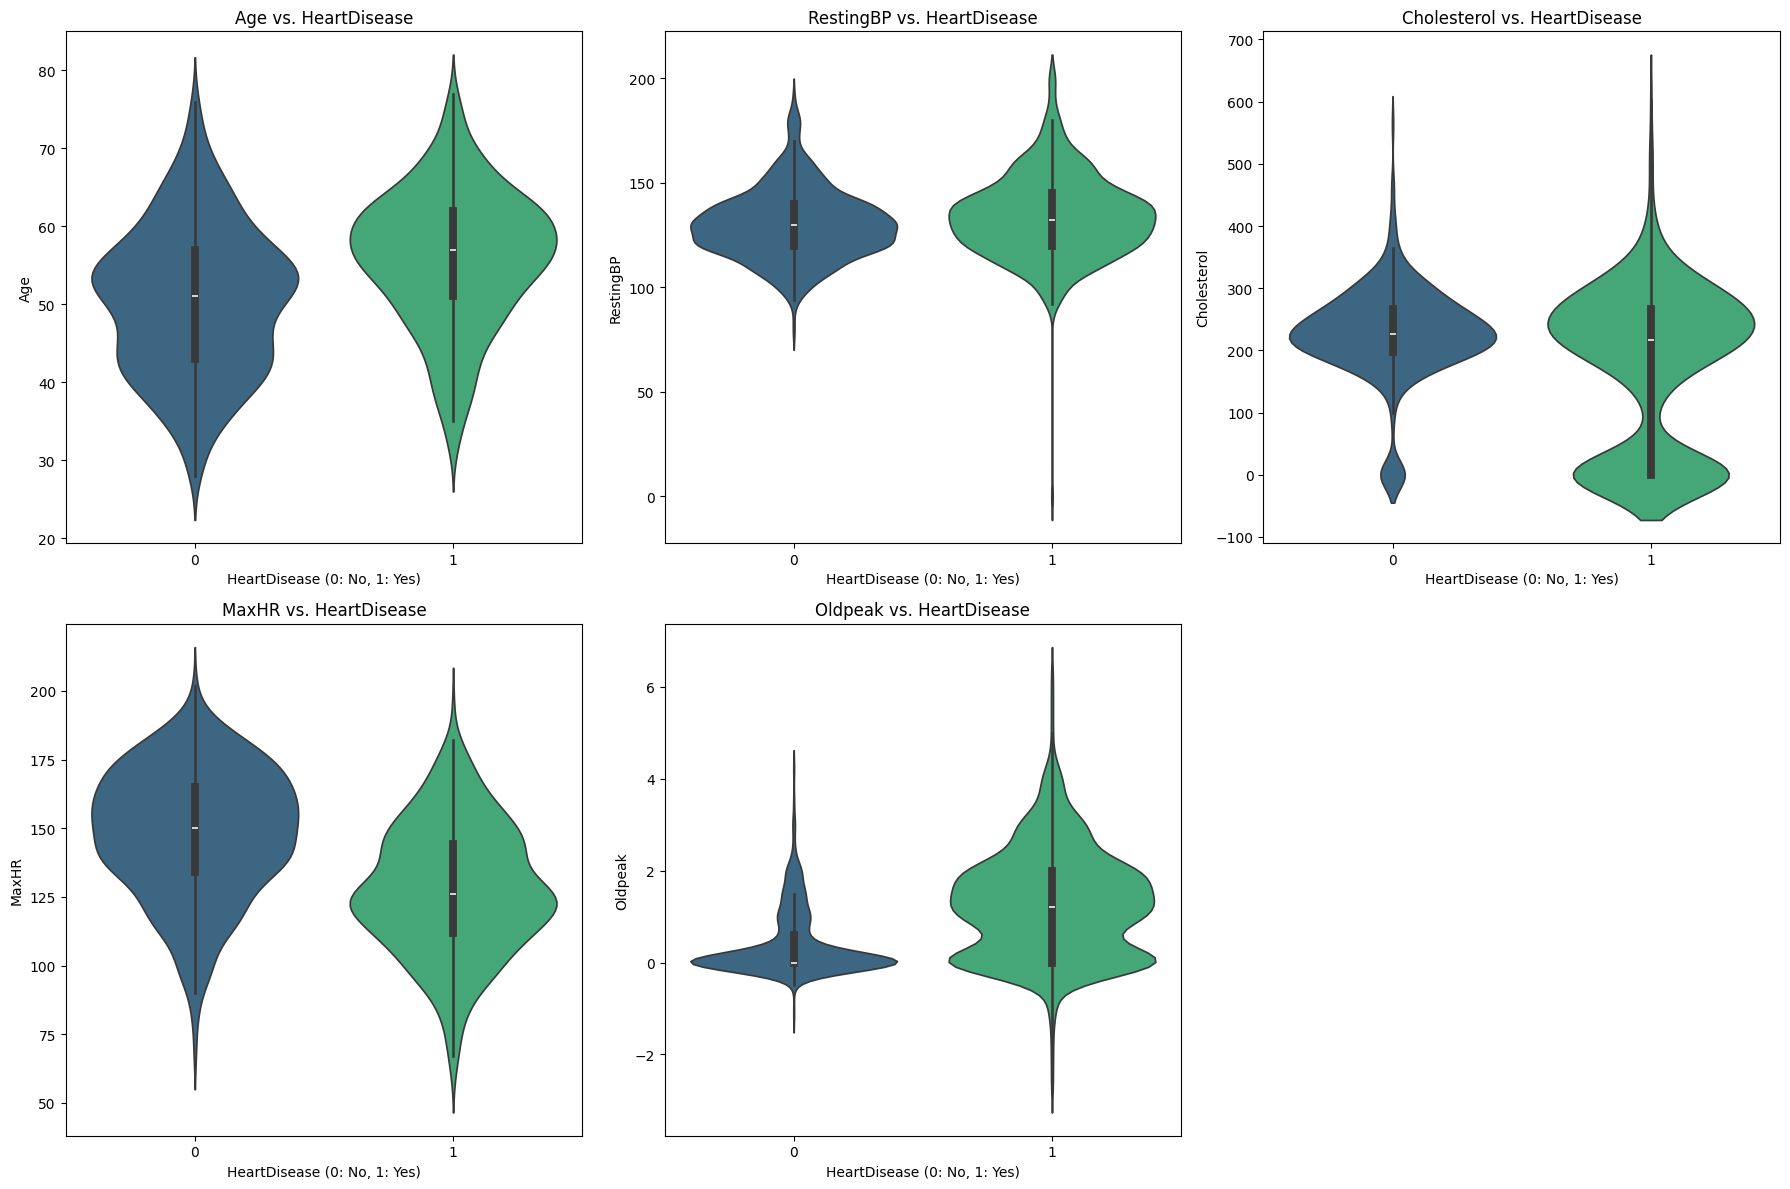

In [140]:
# Define numerical features to analyze with respect to the target variable 'HeartDisease'
numerical_features_for_violin = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Violin plots to visualize the distribution of each numerical feature by heart disease status
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features_for_violin):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(data=df, x='HeartDisease', y=feature, hue='HeartDisease', palette='viridis', legend=False)
    plt.title(f'{feature} vs. HeartDisease')
    plt.xlabel('HeartDisease (0: No, 1: Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



Crosstabulations and Stacked Bar Plots for Categorical Features vs. HeartDisease:

--- Sex vs. HeartDisease ---
HeartDisease    0    1
Sex                   
F             143   50
M             267  458


<Figure size 800x500 with 0 Axes>

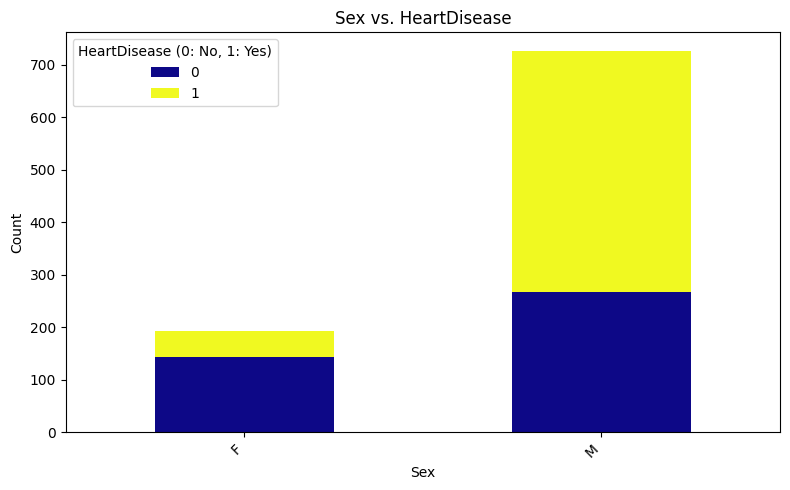


--- ChestPainType vs. HeartDisease ---
HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


<Figure size 800x500 with 0 Axes>

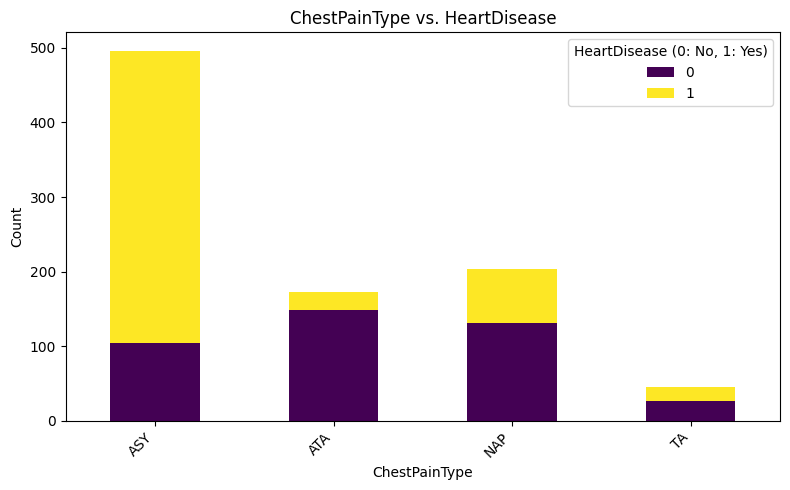


--- RestingECG vs. HeartDisease ---
HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117


<Figure size 800x500 with 0 Axes>

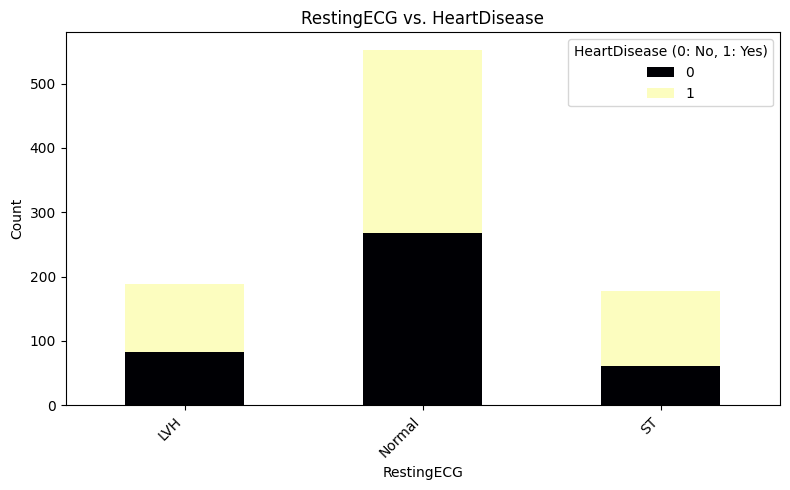


--- ExerciseAngina vs. HeartDisease ---
HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316


<Figure size 800x500 with 0 Axes>

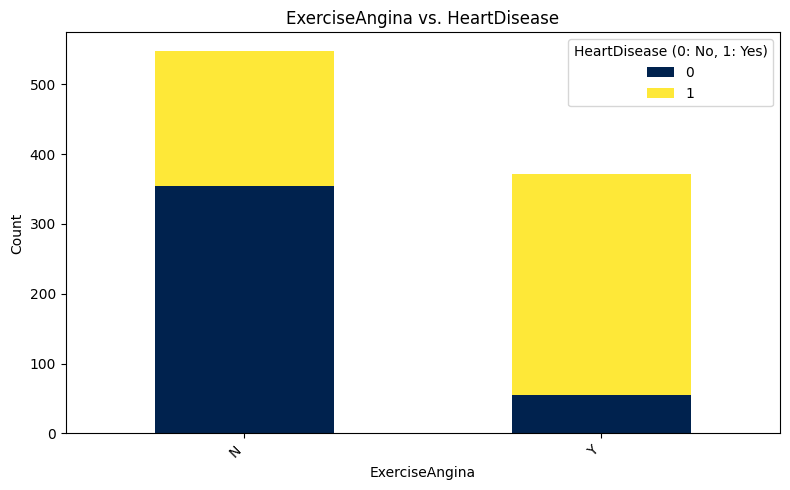


--- ST_Slope vs. HeartDisease ---
HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78


<Figure size 800x500 with 0 Axes>

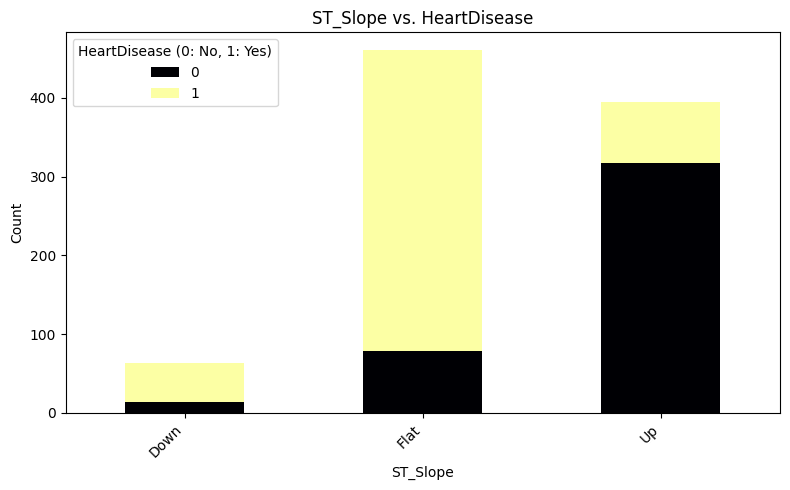

In [141]:
categorical_cols_for_analysis = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("\nCrosstabulations and Stacked Bar Plots for Categorical Features vs. HeartDisease:")

# Define a list of distinct colormaps for plots
colormaps = ['plasma', 'viridis', 'magma', 'cividis', 'inferno']

for i, feature in enumerate(categorical_cols_for_analysis):
    crosstab_feature_hd = pd.crosstab(df[feature], df['HeartDisease'])
    print(f"\n--- {feature} vs. HeartDisease ---")
    print(crosstab_feature_hd)

    plt.figure(figsize=(8, 5))
    crosstab_feature_hd.plot(kind='bar', stacked=True, figsize=(8, 5), colormap=colormaps[i % len(colormaps)])
    plt.title(f'{feature} vs. HeartDisease')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='HeartDisease (0: No, 1: Yes)')
    plt.tight_layout()
    plt.show()


### Learnings from Feature Relationships with Target Variable

**Numerical Features vs. HeartDisease (from Violin Plots):**

*   **Age**: Patients with 'HeartDisease' (1) tend to have a slightly older age distribution compared to those without 'HeartDisease' (0). The median age for heart disease patients appears to be higher, and the distribution is slightly shifted towards older ages.
*   **RestingBP (Resting Blood Pressure)**: Both groups ('HeartDisease' 0 and 1) show similar distributions for 'RestingBP', with some overlap. However, the 'HeartDisease' (1) group seems to have a slightly higher median and more instances of elevated blood pressure, suggesting a subtle but present relationship. The 0 values in RestingBP are physiologically implausible and need to be treated as outliers or missing data.
*   **Cholesterol**: The violin plot for 'Cholesterol' shows a distinct difference. Patients with 'HeartDisease' (1) tend to have lower cholesterol values, and a significant cluster around 0. This reinforces the previous observation about the physiologically implausible 0 values, suggesting they are likely unrecorded or missing data and are strongly associated with heart disease presence in this dataset. The `Cholesterol` distribution for HeartDisease=0 appears to be higher and more spread out.
*   **MaxHR (Maximum Heart Rate Achieved)**: Patients with 'HeartDisease' (1) generally exhibit lower maximum heart rates compared to those without 'HeartDisease' (0). This is a well-known clinical indicator, as reduced exercise capacity (reflected in lower MaxHR) is often associated with heart conditions.
*   **Oldpeak (ST depression induced by exercise relative to rest)**: The distribution of 'Oldpeak' is notably different between the two groups. Patients with 'HeartDisease' (1) show significantly higher 'Oldpeak' values, with a longer tail extending to more severe ST depression, compared to the 'HeartDisease' (0) group which is mostly clustered around 0. This indicates a strong positive correlation between 'Oldpeak' and the presence of heart disease.

**Categorical Features vs. HeartDisease (from Crosstabulations and Stacked Bar Plots):**

*   **Sex**: Males ('M') have a substantially higher proportion of 'HeartDisease' (1) compared to females ('F'). While females make up a smaller portion of the dataset, a larger proportion of males in the dataset have heart disease. This suggests a gender-based disparity in heart disease prevalence within this dataset.
*   **ChestPainType**: Patients with 'ASY' (Asymptomatic) chest pain overwhelmingly belong to the 'HeartDisease' (1) group. Conversely, 'ATA' (Atypical Angina) is predominantly associated with 'HeartDisease' (0). 'NAP' (Non-Anginal Pain) and 'TA' (Typical Angina) show a more balanced distribution but still lean towards 'HeartDisease' (0) and 'HeartDisease' (1) respectively. This implies that ASY chest pain is a strong indicator of heart disease, whereas ATA might be less so.
*   **RestingECG**: All three 'RestingECG' categories ('Normal', 'LVH', 'ST') show a higher count for 'HeartDisease' (1) than 'HeartDisease' (0). However, the proportion of 'HeartDisease' (1) is noticeably higher in the 'LVH' and 'ST' categories compared to 'Normal', suggesting that ECG abnormalities are associated with an increased likelihood of heart disease.
*   **ExerciseAngina**: A very clear pattern emerges here: patients who experience 'ExerciseAngina' ('Y') are far more likely to have 'HeartDisease' (1). Conversely, those who do not experience exercise-induced angina ('N') are more likely to be in the 'HeartDisease' (0) group. This is a powerful predictor.
*   **ST_Slope**: The 'Flat' and 'Down' ST slopes are strongly associated with 'HeartDisease' (1), with a much larger proportion of these categories falling into the 'HeartDisease' (1) group. The 'Up' ST slope, on the other hand, is predominantly found in the 'HeartDisease' (0) group. This aligns with clinical understanding, where 'Flat' or 'Down' slopes during exercise indicate ischemia.

**Overall Insights:**

These analyses confirm that several features have strong relationships with the 'HeartDisease' target variable. 'Oldpeak', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'ChestPainType' (especially 'ASY' type), and 'Sex' show clear distinctions between heart disease positive and negative cases. The 'Cholesterol' feature with its 0 values and unusual distribution for HeartDisease=1 also stands out, requiring careful handling in preprocessing due to its likely indication of missing data.

## Preprocessing and Feature Engineering

In [142]:
# Calculate the median cholesterol value, excluding 0s (assumed to be missing data)
median_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].median()

# Replace 0 values in the 'Cholesterol' column with the calculated median
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

# Print the median used for replacement
print(f"Median Cholesterol (excluding 0s): {median_cholesterol}")

# Confirm that no 0 values remain in the 'Cholesterol' column
print("First 5 rows after replacing 0 cholesterol values:")
print(df[df['Cholesterol'] == 0].head())  # Should be empty if replacement was successful

Median Cholesterol (excluding 0s): 237.0
First 5 rows after replacing 0 cholesterol values:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [143]:
# Separate the dataset into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Features: all columns except 'HeartDisease'
y = df['HeartDisease']               # Target: the column to predict

# Print the shapes to confirm successful split
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (918, 11)
Target (y) shape: (918,)


In [144]:
# Define lists of categorical and numerical features for preprocessing
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Print the selected features for encoding and scaling
print("Categorical Features to Encode:", categorical_features)
print("Numerical Features to Scale:", numerical_features)

Categorical Features to Encode: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Features to Scale: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [145]:
# Apply one-hot encoding to the categorical features and drop the first category to avoid dummy variable trap
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Print the new shape and first few rows of the encoded features
print("Shape of X after one-hot encoding:", X_encoded.shape)
print("First 5 rows of X after one-hot encoding:")
print(X_encoded.head())

Shape of X after one-hot encoding: (918, 15)
First 5 rows of X after one-hot encoding:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0   40        140          289          0    172      0.0   True   
1   49        160          180          0    156      1.0  False   
2   37        130          283          0     98      0.0   True   
3   48        138          214          0    108      1.5  False   
4   54        150          195          0    122      0.0   True   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0               True              False             False               True   
1              False               True             False               True   
2               True              False             False              False   
3              False              False             False               True   
4              False               True             False               True   

   RestingECG_ST  Exerc

In [146]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns from the encoded DataFrame
X_numerical = X_encoded[numerical_features]

# Scale numerical features
X_scaled_array = scaler.fit_transform(X_numerical)

# Create a DataFrame with scaled numerical features, preserving column names
X_scaled = pd.DataFrame(X_scaled_array, columns=numerical_features, index=X_encoded.index)

# Drop original numerical columns from X_encoded and concatenate with scaled numerical features
X_processed = pd.concat([X_scaled, X_encoded.drop(columns=numerical_features)], axis=1)

print("Shape of X_processed after scaling and concatenation:", X_processed.shape)
print("First 5 rows of X_processed:")
print(X_processed.head())

Shape of X_processed after scaling and concatenation: (918, 15)
First 5 rows of X_processed:
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0 -1.433140   0.410909     0.858035  -0.551341  1.382928 -0.832432   True   
1 -0.478484   1.491752    -1.184227  -0.551341  0.754157  0.105664  False   
2 -1.751359  -0.129513     0.745617  -0.551341 -1.525138 -0.832432   True   
3 -0.584556   0.302825    -0.547191  -0.551341 -1.132156  0.574711  False   
4  0.051881   0.951331    -0.903182  -0.551341 -0.581981 -0.832432   True   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0               True              False             False               True   
1              False               True             False               True   
2               True              False             False              False   
3              False              False             False               True   
4              False               True     

## Split Data for Modeling

In [147]:
# Split the processed feature set and target into training and testing subsets
# 80% of the data will be used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Print the shapes of each resulting set to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 15)
X_test shape: (184, 15)
y_train shape: (734,)
y_test shape: (184,)


## Model Selection and Training

In [148]:
# Initialize a RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning (param_grid is already in kernel state)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best ROC AUC score found by GridSearchCV:", grid_search.best_score_)

# Store the best estimator
tuned_rf_model = grid_search.best_estimator_
print("Tuned Random Forest Model (best estimator) stored successfully.")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Best ROC AUC score found by GridSearchCV: 0.9192431571100725
Tuned Random Forest Model (best estimator) stored successfully.


## Model Evaluation

Tuned Random Forest Model Performance on Test Set:
Accuracy: 0.8641
Precision: 0.8868
Recall: 0.8785
F1-Score: 0.8826

Confusion Matrix:
[[65 12]
 [13 94]]


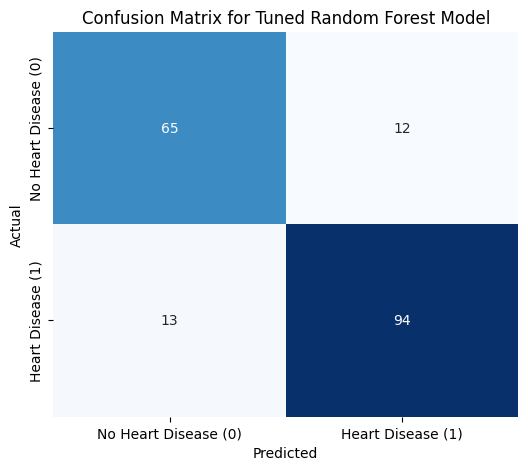


ROC AUC Score: 0.9258


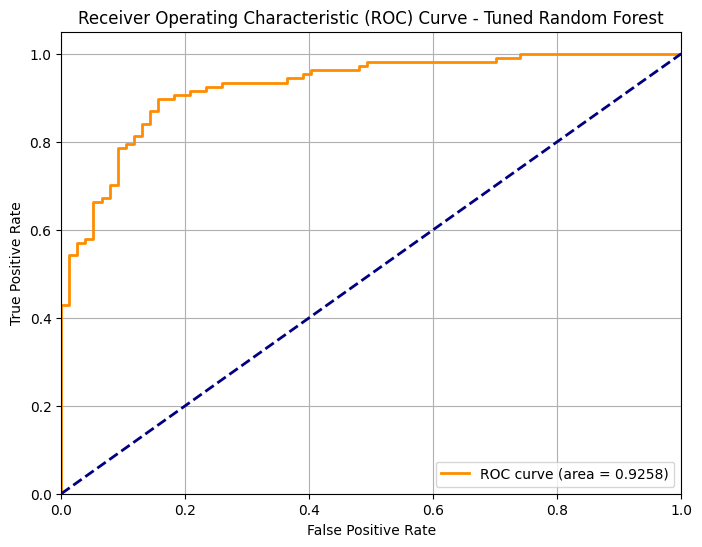

In [149]:
# Make predictions on the test set
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

# Calculate the predicted probabilities for the positive class
y_pred_proba_tuned_rf = tuned_rf_model.predict_proba(X_test)[:, 1]

# Calculate and print classification metrics
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
precision_tuned_rf = precision_score(y_test, y_pred_tuned_rf)
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf)
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf)

print(f"Tuned Random Forest Model Performance on Test Set:")
print(f"Accuracy: {accuracy_tuned_rf:.4f}")
print(f"Precision: {precision_tuned_rf:.4f}")
print(f"Recall: {recall_tuned_rf:.4f}")
print(f"F1-Score: {f1_tuned_rf:.4f}")

# Generate and print the confusion matrix
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
print(f"\nConfusion Matrix:\n{cm_tuned_rf}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease (0)', 'Heart Disease (1)'],
            yticklabels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.show()

# Calculate and print ROC AUC score
auc_tuned_rf = roc_auc_score(y_test, y_pred_proba_tuned_rf)
print(f"\nROC AUC Score: {auc_tuned_rf:.4f}")

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_tuned_rf, tpr_tuned_rf, thresholds_tuned_rf = roc_curve(y_test, y_pred_proba_tuned_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned_rf, tpr_tuned_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_tuned_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Initial Data Overview**: The dataset contains 918 entries and 12 columns, with no initial missing values. It includes 6 numerical (`int64`, `float64`) and 5 categorical (`object`) features.
*   **Descriptive Statistics**:
    *   **Numerical**: 'Age' averages around 53.5 years. 'RestingBP' ranges from 80-200 mm Hg, averaging 132.5. 'Cholesterol' shows a wide range (85-603 mg/dL, mean 243.2), with physiologically implausible 0 values initially present, indicating potential missing data. 'FastingBS' indicates ~23% of patients have high blood sugar. 'MaxHR' averages 136.8 bpm. 'Oldpeak' is right-skewed, with values ranging from -2.6 to 6.2. The target variable, 'HeartDisease', shows a slight imbalance with 55.3% of patients having the condition.
    *   **Categorical**: The dataset is heavily skewed towards males (79% male vs. 21% female). 'Asymptomatic' (ASY) is the most common Chest Pain Type (54%). 'Normal' RestingECG (60%) and 'Flat' ST_Slope (50%) are also prevalent. Approximately 40% of patients experience 'ExerciseAngina'.
*   **Numerical Feature Distributions**: Visualizations revealed significant outliers and skewness in 'RestingBP', 'Cholesterol' (with a distinct peak at 0), and 'Oldpeak', suggesting the need for preprocessing.
*   **Categorical Feature Distributions**: Confirmed the high proportion of males and the dominance of 'ASY' chest pain.
*   **Feature Relationships**:
    *   **Numerical**: A moderate negative correlation (-0.38) was observed between 'Age' and 'MaxHR'. 'Cholesterol' showed very weak linear correlations with other numerical features.
    *   **Categorical**: A strong relationship was found between 'ExerciseAngina' and 'ST_Slope': patients with exercise-induced angina ('Y') were much more likely to have 'Flat' or 'Down' ST_Slope, while those without ('N') predominantly had an 'Up' ST_Slope. Gender differences in 'ChestPainType' were also noted, with males more frequently exhibiting 'ASY' pain.
*   **Relationship with Target Variable ('HeartDisease')**:
    *   **Numerical**: Patients with heart disease tend to be slightly older, have lower 'MaxHR', and significantly higher 'Oldpeak' values. The 'Cholesterol' feature showed a notable cluster of 0 values in the heart disease group, strongly suggesting these zeroes are indeed missing values associated with the presence of the disease.
    *   **Categorical**: 'ASY' ChestPainType, 'LVH' and 'ST' RestingECG abnormalities, presence of 'ExerciseAngina' ('Y'), and 'Flat' or 'Down' ST_Slope were strongly associated with a higher likelihood of 'HeartDisease'. Males also exhibited a substantially higher proportion of 'HeartDisease'.
*   **Advanced Preprocessing Impact**:
    *   **Cholesterol Handling**: The 0 values in the 'Cholesterol' column were imputed with the median of non-zero values, which was calculated as 237.0.
    *   **Encoding**: Categorical features were successfully one-hot encoded (`drop_first=True`), increasing the feature count.
    *   **Scaling**: Numerical features were scaled using `StandardScaler`, ensuring uniform contribution to the model.
*   **Tuned Random Forest Model Performance**:
    *   The best hyperparameters identified through GridSearchCV were `criterion='entropy'`, `max_depth=10`, `max_features='sqrt'`, and `n_estimators=300`.
    *   The model achieved an **Accuracy of 0.8641**, **Precision of 0.8868**, **Recall of 0.8785**, and an **F1-Score of 0.8826** on the test set.
    *   The **ROC AUC score was 0.9274**, indicating strong discriminative power.
    *   The confusion matrix showed 65 True Negatives, 94 True Positives, 12 False Positives, and 13 False Negatives. This indicates that the model correctly identified heart disease in 94 cases and correctly identified no heart disease in 65 cases, with a relatively balanced number of false positives and false negatives.

### Insights or Next Steps

*   The dataset contains strong indicators for heart disease, particularly 'Oldpeak', 'MaxHR', 'ExerciseAngina', 'ST_Slope', and certain 'ChestPainType' categories. The Tuned Random Forest model demonstrates robust performance (ROC AUC of 0.9274), making it a suitable choice for predicting 'HeartDisease'.
*   Further investigation into feature importance from the Random Forest model could offer clinical insights, and exploring different classification thresholds for the model might optimize specific metrics (e.g., recall to minimize false negatives) depending on the business objective.
